<a href="https://colab.research.google.com/github/KeshavaOfficial/CPP/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [86]:
df = pd.read_csv('/content/heart_disease.csv')

In [87]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


<Axes: ylabel='Count'>

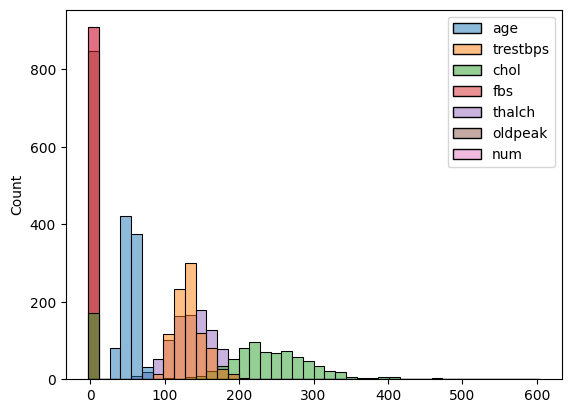

In [113]:
sns.histplot(df)

<Axes: >

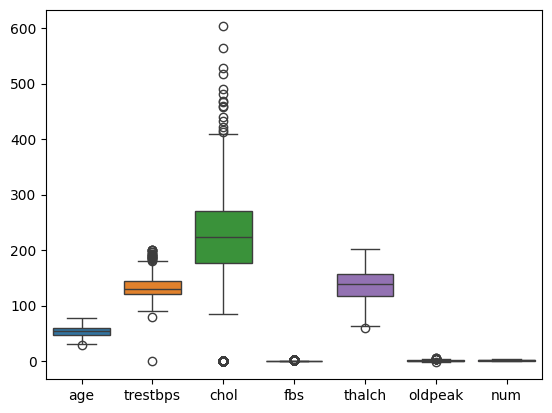

In [118]:
sns.boxplot(df)

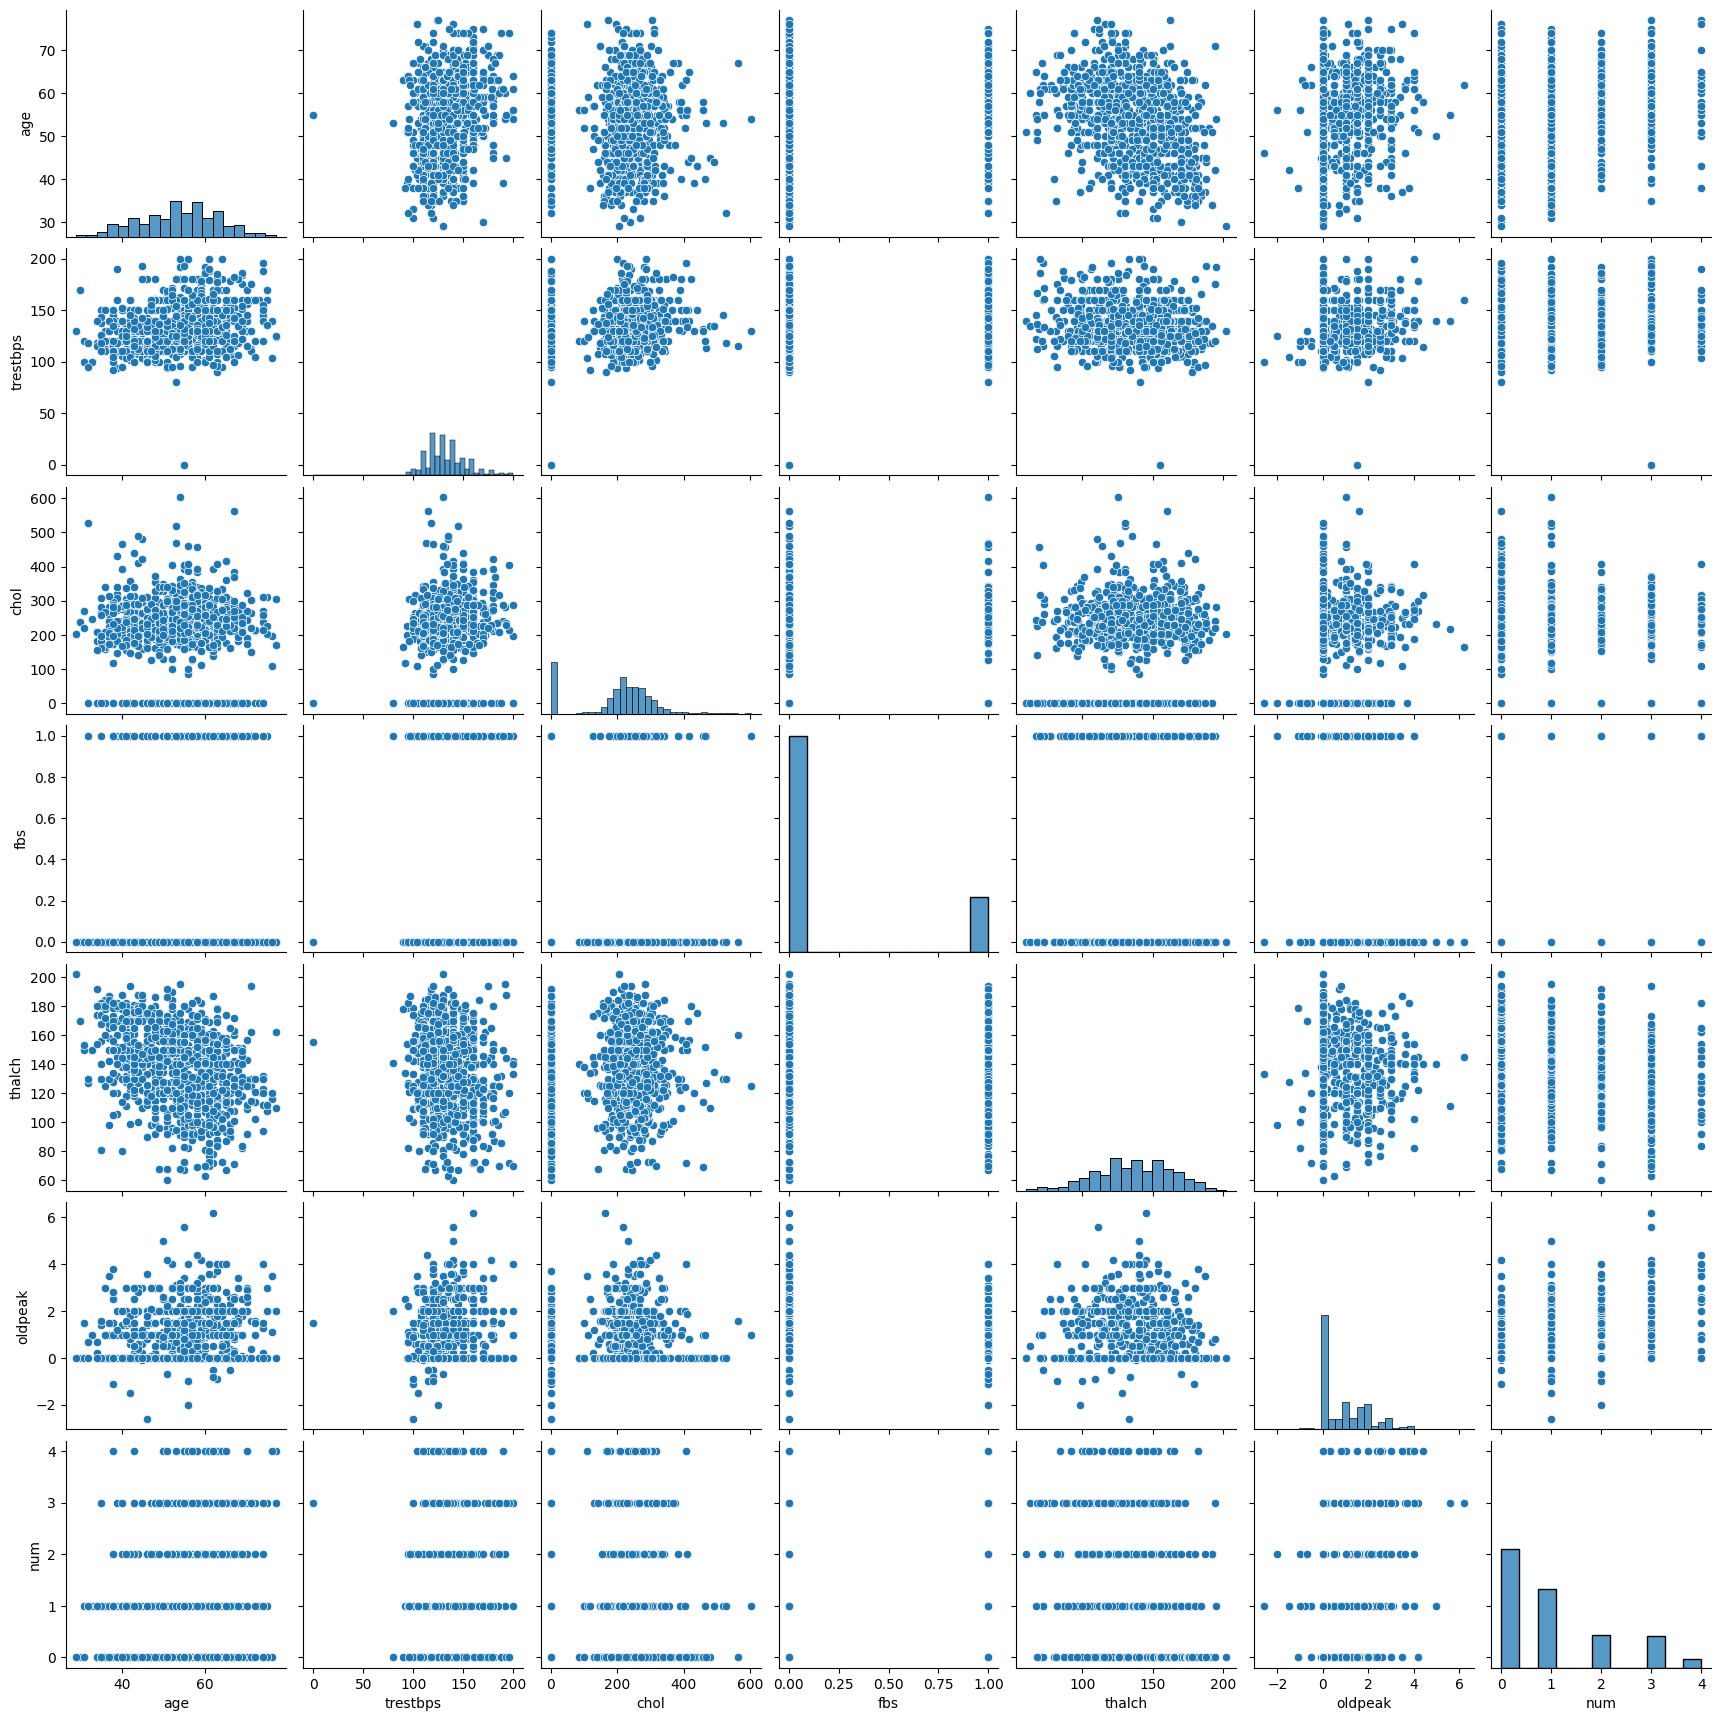

In [119]:
sns.pairplot(df)

In [121]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [122]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [124]:
df_num = df.sort_values(by=['num'], ascending=False)
df_num

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
886,65,Female,asymptomatic,150,225,False,lv hypertrophy,114,FALSE,1.0,flat,reversable defect,4
907,57,Male,asymptomatic,142,277,True,st-t abnormality,182,FALSE,NaN,flat,fixed defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,normal,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,fixed defect,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,54,Male,atypical angina,96,182,False,st-t abnormality,103,TURE,NaN,upsloping,reversable defect,0
392,63,Male,atypical angina,90,165,False,st-t abnormality,178,FALSE,NaN,downsloping,fixed defect,0
391,35,Male,non-anginal,143,161,False,st-t abnormality,81,FALSE,NaN,upsloping,normal,0
390,62,Male,typical angina,134,139,False,st-t abnormality,96,TURE,NaN,flat,fixed defect,0


In [125]:
x = df.iloc[:, 0:12]

In [126]:
y = df['num']

In [127]:
y

,num
0,0
1,0
2,0
3,0
4,0
...,...
903,4
904,4
905,4
906,4


In [128]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect
...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,fixed defect
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,fixed defect
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,normal
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,reversable defect


In [129]:
x.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal'],
      dtype='object')

In [130]:
y.head()

,num
0,0
1,0
2,0
3,0
4,0


In [131]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit_transform(x['sex'])
x['sex'] = le.fit_transform(x['sex'])

In [132]:
le.fit_transform(x['cp'])
x['cp'] = le.fit_transform(x['cp'])

In [133]:
le.fit_transform(x['fbs'])
x['fbs'] = le.fit_transform(x['fbs'])

In [134]:
le.fit_transform(x['restecg'])
x['restecg'] = le.fit_transform(x['restecg'])

In [135]:
le.fit_transform(x['exang'])
x['exang'] = le.fit_transform(x['exang'])


In [136]:
le.fit_transform(x['slope'])
x['slope'] = le.fit_transform(x['slope'])

In [137]:
le.fit_transform(x['thal'])
x['thal'] = le.fit_transform(x['thal'])


In [138]:
x.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [139]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
imputer.fit(x[['oldpeak']])
x[['oldpeak']] = imputer.transform(x[['oldpeak']])


In [140]:
x.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [142]:
x.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
age,1.000000,0.052194,-0.067589,0.253999,-0.099967,0.176702,-0.007518,-0.328088,0.210074,0.232718,-0.054644,0.049875
sex,0.052194,1.000000,-0.125130,0.016441,-0.191513,0.092167,0.078158,-0.178794,0.192197,0.101209,-0.045065,0.052589
cp,-0.067589,-0.125130,1.000000,0.009078,0.071160,-0.045228,-0.072048,0.248211,-0.287621,-0.170467,0.092177,-0.035644
trestbps,0.253999,0.016441,0.009078,1.000000,0.117488,0.111614,0.058148,-0.133360,0.182705,0.152162,0.006748,0.033738
chol,-0.099967,-0.191513,0.071160,0.117488,1.000000,-0.113721,-0.194473,0.197907,-0.029853,0.028744,0.047292,0.009640
fbs,0.176702,0.092167,-0.045228,0.111614,-0.113721,1.000000,0.067320,-0.065428,0.060590,0.022756,-0.026636,0.012954
restecg,-0.007518,0.078158,-0.072048,0.058148,-0.194473,0.067320,1.000000,-0.195198,0.126247,-0.031561,-0.084796,-0.149155
thalch,-0.328088,-0.178794,0.248211,-0.133360,0.197907,-0.065428,-0.195198,1.000000,-0.359351,-0.128728,0.224048,-0.031230
exang,0.210074,0.192197,-0.287621,0.182705,-0.029853,0.060590,0.126247,-0.359351,1.000000,0.318034,-0.149261,0.060492
oldpeak,0.232718,0.101209,-0.170467,0.152162,0.028744,0.022756,-0.031561,-0.128728,0.318034,1.000000,-0.184895,0.086583


In [141]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [151]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', max_depth= 3 )
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [152]:
y_pred = model.predict(x_test)

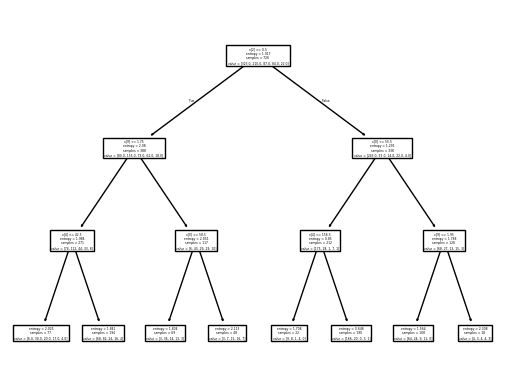

In [164]:
tree.plot_tree(model);

In [165]:
x.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal'],
      dtype='object')

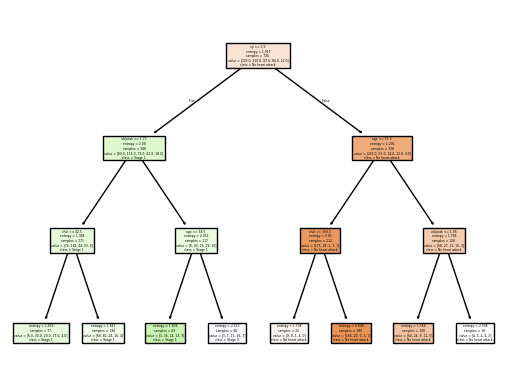

In [176]:
fn = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca']
cn = ['No heart attack', 'Stage 1', 'Stage 2', 'Stage 3', 'stage 4' ]
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [177]:
text = tree.export_text(model,max_depth=3)
print(text)

|--- feature_2 <= 0.50
|   |--- feature_9 <= 1.75
|   |   |--- feature_4 <= 42.50
|   |   |   |--- class: 1
|   |   |--- feature_4 >  42.50
|   |   |   |--- class: 1
|   |--- feature_9 >  1.75
|   |   |--- feature_0 <= 58.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  58.50
|   |   |   |--- class: 3
|--- feature_2 >  0.50
|   |--- feature_0 <= 55.50
|   |   |--- feature_4 <= 156.50
|   |   |   |--- class: 0
|   |   |--- feature_4 >  156.50
|   |   |   |--- class: 0
|   |--- feature_0 >  55.50
|   |   |--- feature_9 <= 1.95
|   |   |   |--- class: 0
|   |   |--- feature_9 >  1.95
|   |   |   |--- class: 0



In [248]:
model.feature_importances_

array([0.27083797, 0.32765895, 0.19798492, 0.20351816])

In [179]:
import pandas as pd
feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False)
feature_imp

,0
cp,0.525732
age,0.159774
chol,0.157291
oldpeak,0.157203
trestbps,0.000000
sex,0.000000
restecg,0.000000
fbs,0.000000
thalach,0.000000
exang,0.000000


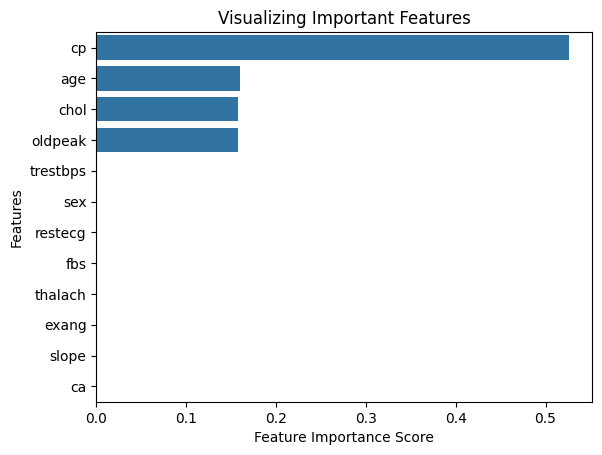

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

chest pain #cp  is the import feature among all the features

In [181]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test, y_pred)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.70      0.70        76
           1       0.42      0.71      0.53        55
           2       0.00      0.00      0.00        22
           3       0.20      0.13      0.16        23
           4       0.00      0.00      0.00         6

    accuracy                           0.52       182
   macro avg       0.27      0.31      0.28       182
weighted avg       0.45      0.52      0.47       182



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [182]:
accuracy_score(y_test, y_pred)

0.521978021978022

#Hyper para tunning to improve Accuracy



In [183]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini', max_depth= 3 )
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [184]:
y_pred = model.predict(x_test)

In [185]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test, y_pred)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.68      0.73        76
           1       0.37      0.49      0.42        55
           2       0.21      0.14      0.17        22
           3       0.32      0.39      0.35        23
           4       0.00      0.00      0.00         6

    accuracy                           0.50       182
   macro avg       0.34      0.34      0.33       182
weighted avg       0.50      0.50      0.50       182



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [186]:
accuracy_score(y_test, y_pred)

0.5

#changing NO.of depths



In [212]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini', max_depth= 4 )
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [213]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test, y_pred)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.93      0.74        76
           1       0.59      0.36      0.45        55
           2       0.19      0.27      0.22        22
           3       0.00      0.00      0.00        23
           4       0.00      0.00      0.00         6

    accuracy                           0.53       182
   macro avg       0.28      0.31      0.28       182
weighted avg       0.46      0.53      0.47       182



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [214]:
accuracy_score(y_test, y_pred)

0.532967032967033

#change to entropy with Max depth 4


In [221]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', max_depth= 5 )
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [222]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test, y_pred)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.84      0.76        76
           1       0.53      0.42      0.47        55
           2       0.21      0.32      0.25        22
           3       0.27      0.13      0.18        23
           4       0.33      0.17      0.22         6

    accuracy                           0.54       182
   macro avg       0.41      0.38      0.38       182
weighted avg       0.52      0.54      0.52       182



#as we came to know the CP, age, chol, oldpeak is the import feature we will ignore other features that are not important by droping the columns like


In [261]:
x.columns

Index(['age', 'cp', 'chol', 'oldpeak'], dtype='object')

In [227]:
x.drop(columns=['sex', 'trestbps', 'fbs', 'restecg',  'exang', 'slope'], inplace=True)

In [228]:
x.head()

,age,cp,chol,thalch,oldpeak,thal
0,63,3,233,150,2.3,0
1,41,1,203,132,0.0,0
2,57,0,192,148,0.4,0
3,52,3,186,190,0.0,0
4,57,0,201,126,1.5,0


In [233]:
x.drop(columns=['thalch'], inplace=True)

KeyError: "['thalch'] not found in axis"

In [234]:
x.head()

,age,cp,chol,oldpeak,thal
0,63,3,233,2.3,0
1,41,1,203,0.0,0
2,57,0,192,0.4,0
3,52,3,186,0.0,0
4,57,0,201,1.5,0


In [235]:
x.drop(columns=['thal'], inplace=True)

#now lets train the thid data using this features and find the accuracy


In [236]:
x

,age,cp,chol,oldpeak
0,63,3,233,2.300000
1,41,1,203,0.000000
2,57,0,192,0.400000
3,52,3,186,0.000000
4,57,0,201,1.500000
...,...,...,...,...
903,53,0,0,1.500000
904,62,0,170,3.000000
905,56,2,0,2.500000
906,56,2,208,0.891253


In [237]:
y

,num
0,0
1,0
2,0
3,0
4,0
...,...
903,4
904,4
905,4
906,4


In [262]:
from sklearn.model_selection  import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [263]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', max_depth= 5 )
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

[Text(0.5, 0.9166666666666666, 'x[1] <= 0.5\nentropy = 1.917\nsamples = 726\nvalue = [323.0, 210.0, 87.0, 84.0, 22.0]'),
 Text(0.25, 0.75, 'x[3] <= 1.75\nentropy = 2.08\nsamples = 388\nvalue = [80.0, 155.0, 73.0, 62.0, 18.0]'),
 Text(0.375, 0.8333333333333333, 'True  '),
 Text(0.125, 0.5833333333333334, 'x[2] <= 42.5\nentropy = 1.984\nsamples = 271\nvalue = [74, 112, 44, 33, 8]'),
 Text(0.0625, 0.4166666666666667, 'x[0] <= 58.5\nentropy = 2.025\nsamples = 77\nvalue = [6.0, 30.0, 20.0, 17.0, 4.0]'),
 Text(0.03125, 0.25, 'x[0] <= 50.5\nentropy = 1.948\nsamples = 46\nvalue = [2, 17, 17, 6, 4]'),
 Text(0.015625, 0.08333333333333333, 'entropy = 1.72\nsamples = 20\nvalue = [1, 9, 6, 4, 0]'),
 Text(0.046875, 0.08333333333333333, 'entropy = 1.929\nsamples = 26\nvalue = [1, 8, 11, 2, 4]'),
 Text(0.09375, 0.25, 'x[0] <= 66.0\nentropy = 1.763\nsamples = 31\nvalue = [4, 13, 3, 11, 0]'),
 Text(0.078125, 0.08333333333333333, 'entropy = 1.713\nsamples = 28\nvalue = [4, 13, 2, 9, 0]'),
 Text(0.109375,

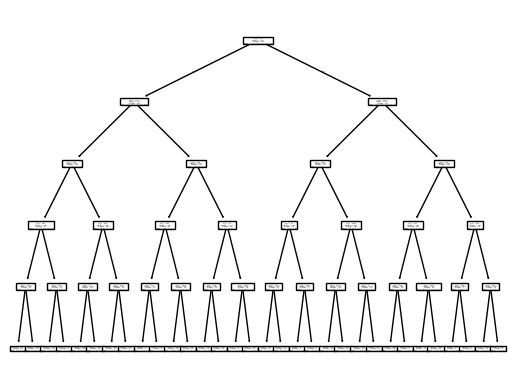

In [264]:
tree.plot_tree(model)

In [265]:
x.columns

Index(['age', 'cp', 'chol', 'oldpeak'], dtype='object')

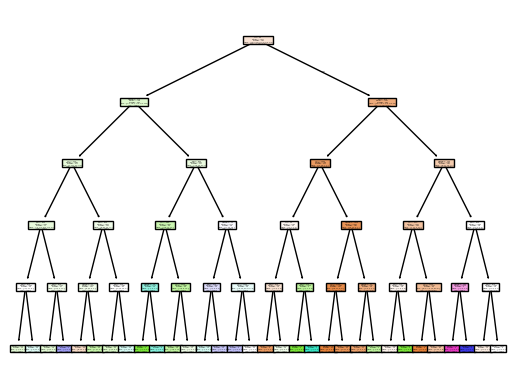

In [266]:
fn = ['age', 'cp', 'chol', 'oldpeak']
cn = ['No heart attack', 'Stage 1', 'Stage 2', 'Stage 3', 'stage 4' ]
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [267]:
model.feature_importances_

array([0.27668086, 0.32765895, 0.19798492, 0.19767527])

In [268]:
import pandas as pd
feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False)
feature_imp

,0
cp,0.327659
age,0.276681
chol,0.197985
oldpeak,0.197675


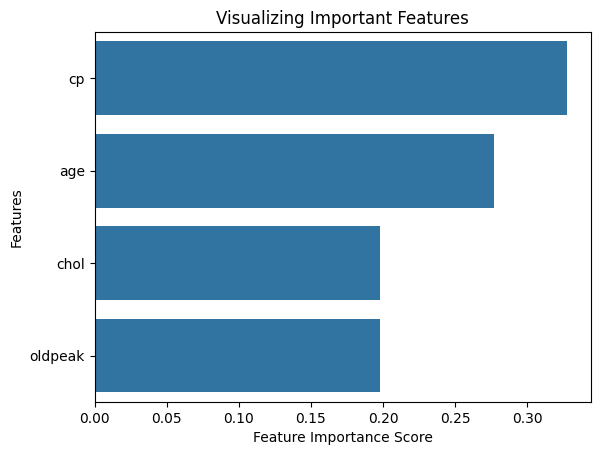

In [269]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [325]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', max_depth= 5, min_samples_split= 70)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [326]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test, y_pred)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.87      0.76        76
           1       0.49      0.62      0.54        55
           2       0.00      0.00      0.00        22
           3       0.20      0.13      0.16        23
           4       0.00      0.00      0.00         6

    accuracy                           0.57       182
   macro avg       0.27      0.32      0.29       182
weighted avg       0.46      0.57      0.50       182



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [327]:
accuracy_score(y_test, y_pred)

0.5659340659340659

In [337]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini', max_depth= 6, min_samples_split= 5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test, y_pred)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.92      0.74        76
           1       0.51      0.36      0.43        55
           2       0.21      0.27      0.24        22
           3       0.00      0.00      0.00        23
           4       0.00      0.00      0.00         6

    accuracy                           0.53       182
   macro avg       0.27      0.31      0.28       182
weighted avg       0.44      0.53      0.47       182



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
